## AMSC 661, Homework 5
#### March 8, 2023
#### Dominic Flocco

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import math

$$ H(p_1, p_2, q_1, q_2) = \frac{1}{2}p_1^2 + \frac{1}{2} p_2^2 - \frac{1}{\sqrt{q_1^2 + q_2^2}}$$

$$ f(z) = \frac{d}{dt}\begin{bmatrix}p_1 \\ p_2 \\ q_1 \\ q_2\end{bmatrix} = \begin{bmatrix}\frac{q_1}{(q_1^2 + q_2^2)^{3/2}} \\ \frac{q_2}{(q_1^2 + q_2^2)^{3/2}} \\ p_1 \\ p_2\end{bmatrix}$$

In [2]:
tol = 1.0e-14
maxiters = 20
def f(z): 
    p1, p2, q1, q2 = z[0], z[1], z[2], z[3]
    dy = np.zeros(4)
    dy[0] = - (q1)/(((q1**2 + q2**2)**(3/2))) # dp1/dt
    dy[1] = - (q2)/(((q1**2 + q2**2)**(3/2))) # dp2/dt
    dy[2] =  p1 # dq1/dt
    dy[3] =  p2 # dq1/dt
    return dy 

def Jac(z): 
    p1, p2, q1, q2 = z[0], z[1], z[2], z[3]
    Df = np.zeros((4,4))
    Df[2,0] = 1 # df3/dp1
    Df[3,1] = 1 # df4/dp2
    Df[0,2] = (q2**2 - 2*q1**2)/((q1**2 + q2**2)**(5/2)) # df1/dq1
    Df[0,3] = (-3*q1*q2)/((q1**2+q2**2)**(5/2)) # df1/dq2
    Df[1,2] = (-3*q1*q2)/((q1**2+q2**2)**(5/2)) # df2/dq1
    Df[1,3] = (q1**2 - 2*q2**2)/((q1**2 + q2**2)**(5/2)) # df2/dq2
    return Df

def NewtonIter(k, z, h):
    aux = z + (h/2)*k
    F = k - f(aux)
    DF = np.eye(4,4) - (h/2)*Jac(aux)
    return k - np.linalg.solve(DF, F)

def midPointStep(zn, h):
    aux = np.eye(4,4)-(h/2)*Jac(zn)
    k = np.linalg.solve(aux, f(zn)) 
    for j in range(maxiters):
        k = NewtonIter(k,zn, h)
        norm = np.linalg.norm(k - f(zn + (h/2)*k))
        if norm < tol:
            break
    z = zn + h*k
    return z

def Hamiltonian(z):
    p1, p2, q1, q2 = z[0], z[1], z[2], z[3]
    return 1/2*p1**2 + 1/2*p2**2 - 1/(math.sqrt(q1**2 + q2**2))
    


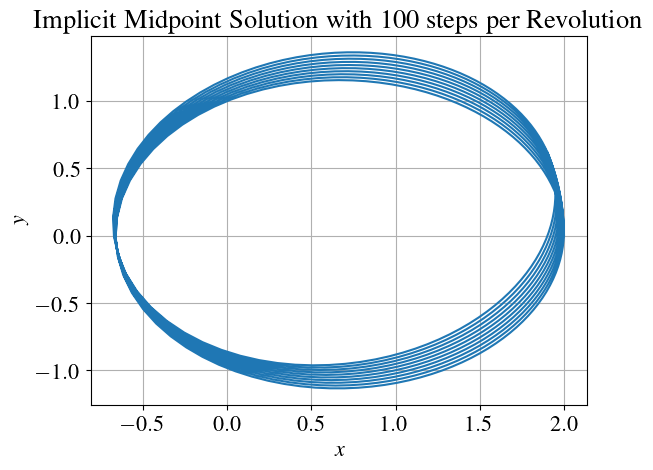

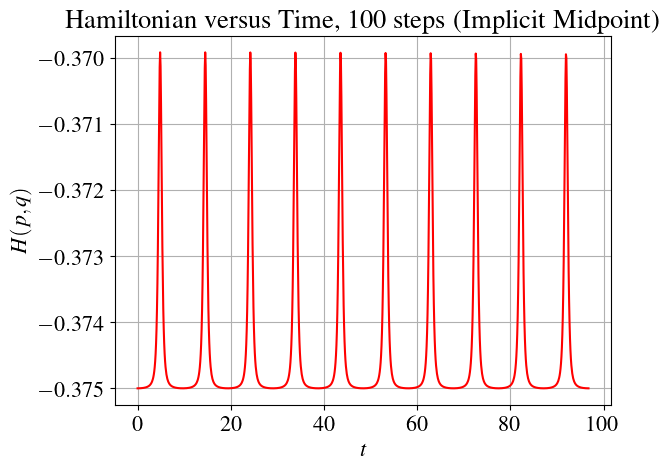

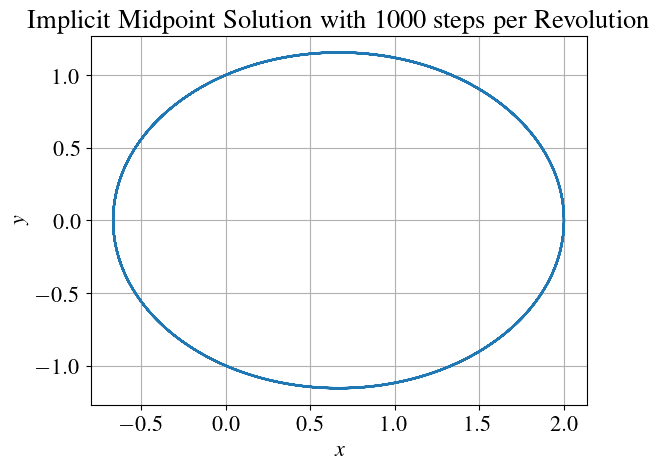

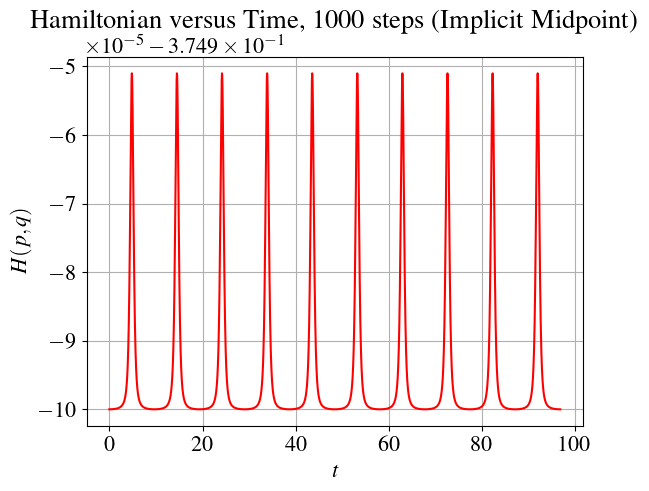

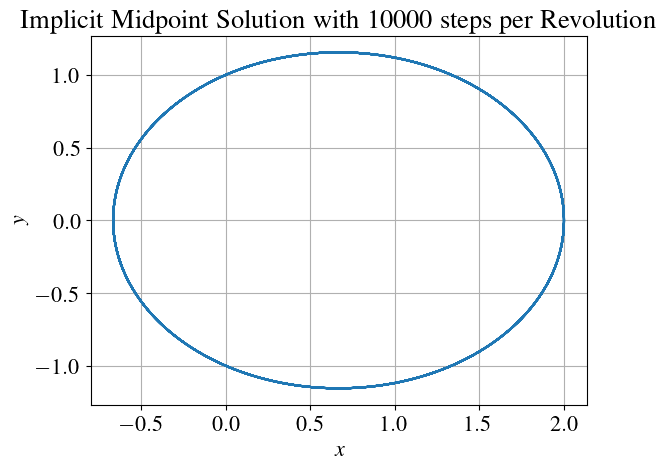

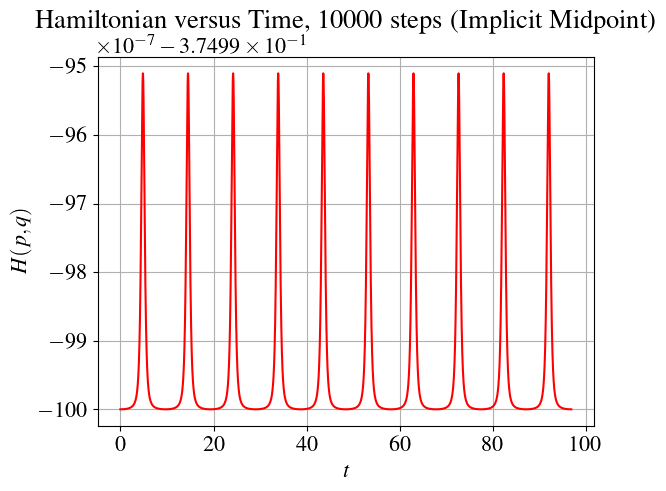

In [4]:

a = 4/3 
Nrevs = 10
period = 2*np.pi*(a**(3/2))
tmax = period*Nrevs 
steps = [100, 1000, 10000]
for s in steps:
    stepsPer = s
    h = period/stepsPer
    Nsteps = int(np.ceil(tmax/h))
    u = np.zeros((Nsteps+1, 4))
    u[0,:] = np.array([0,1/2, 2, 0])
    
    for j in range(Nsteps): 
        u[j+1,:] = midPointStep(u[j], h)

    plt.rcParams.update({
        "font.family": "Times", 
        "text.usetex": True,
        "font.size": 16
    })
    plt.plot(u[:,2], u[:,3])
    plt.grid()
    plt.title(f"Implicit Midpoint Solution with {stepsPer} steps per Revolution")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.show()

    ham = np.array([Hamiltonian(u[i]) for i in range(Nsteps + 1)])
    t = np.arange(0,(Nsteps+1)*h,h)
    plt.plot(t, ham, color='red')
    plt.grid()
    plt.title(f"Hamiltonian versus Time, {stepsPer} steps (Implicit Midpoint)")
    plt.xlabel("$t$")
    plt.ylabel("$H(p,q)$")
    plt.show()

For a seperable Hamiltonian $H(p_1, p_2, q_1, q_2) = T(p_1, p_2) + U(q_1, q_2)$, the Stoermer-Verlet method is explicit of the form 
\begin{align*}
	p_{n+ 1/2}&=p_n - \frac{h}{2} \nabla_q U(q_n)\\
	q_{n+1} &= q_n + h\nabla_p T(p_{n+1/2}) = q_n + h\nabla_p T\bigg(p_n - \frac{h}{2} \nabla_q U(q_n)\bigg) \\ 
	p_{n+1} &= p_n - \frac{h}{2} \bigg(\nabla_q U(q_n) +\nabla_q U(q_{n+1})\bigg) =  p_n - \frac{h}{2} \bigg(\nabla_q U(q_n)+\nabla_q U\bigg(q_n + h\nabla_p T\bigg(p_n - \frac{h}{2} \nabla_q U(q_n))\bigg)\bigg)\bigg)
\end{align*}
For the gravitational field problem, $$T(p) = \frac{1}{2}p_1^2 + \frac{1}{2} p_2^2\quad \text{and}\quad U(q) = \frac{-1}{\sqrt{q_1^2 + q_2^2}},$$ so $$ \nabla_q U(q_n) = \begin{bmatrix}\partial U/\partial q_1 \\\partial U/\partial q_2\end{bmatrix} = \begin{bmatrix}q_1(q_1^2 + q_2^2)^{-3/2}\\ q_2(q_1^2 + q_2^2)^{-3/2}\end{bmatrix} \quad \text{and}\quad \nabla_q T(p_n) = \begin{bmatrix}\partial T/\partial p_1 \\ \partial T/\partial p_2\end{bmatrix} = \begin{bmatrix}p_1 \\ p_2\end{bmatrix}$$
Therefore, the explicity Stoermer-Verlet updates are 
\begin{align*}
p_{n+ 1/2}&=p_n - \frac{h}{2} \nabla_q U(q_n) = p_n - \frac{h}{2}\begin{bmatrix}q_1(q_1^2 + q_2^2)^{-3/2}\\ q_2(q_1^2 + q_2^2)^{-3/2}\end{bmatrix}
\end{align*}
Here, $p_i$ and $q_i$ are the $i$ th components of $p_n$ and $q_n$, respectively. 

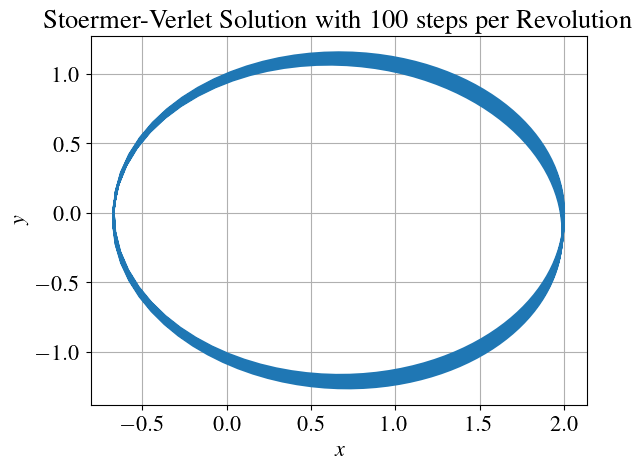

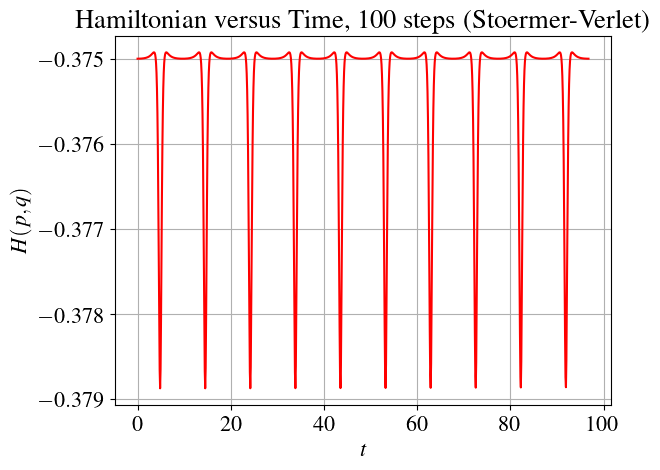

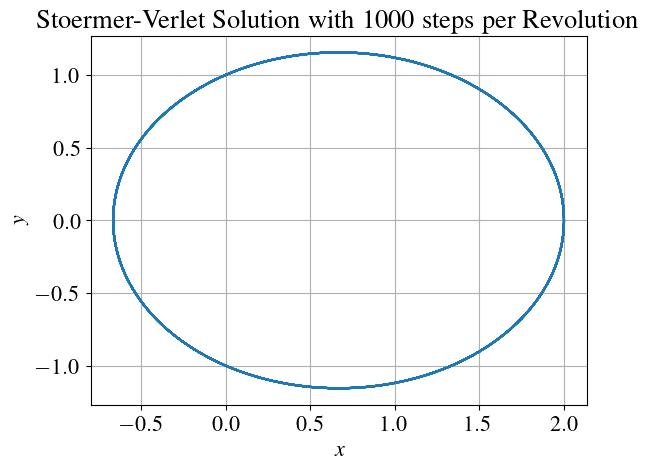

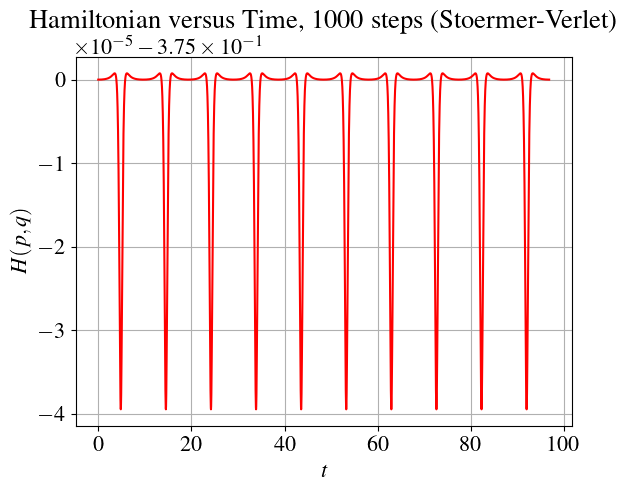

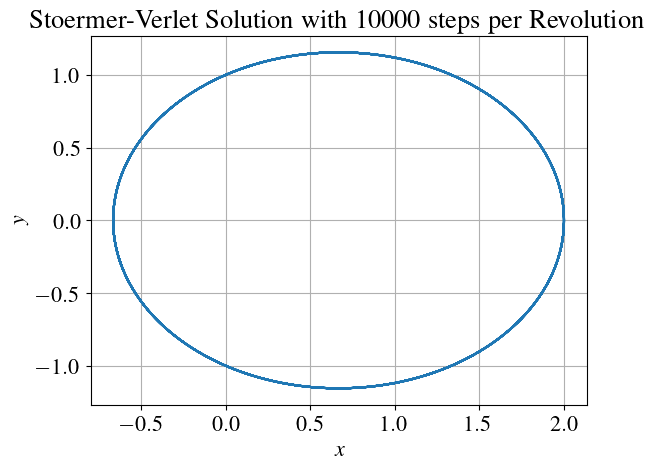

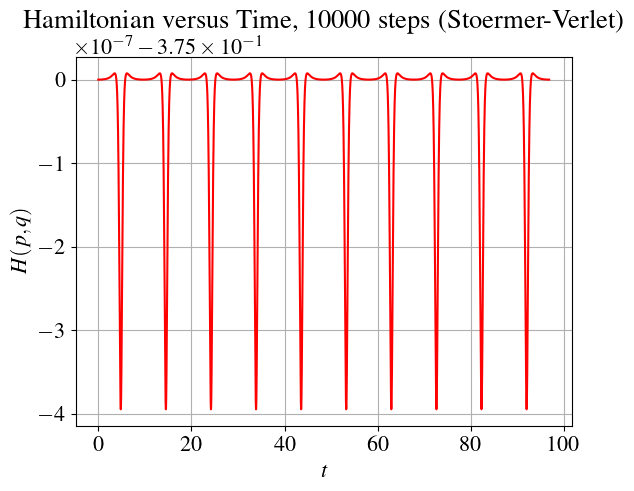

In [12]:
tol = 1.0e-14
def gradU(q1, q2):
    return np.array([q1/((q1**2 + q2**2)**(3/2)), q2/((q1**2 + q2**2)**(3/2))])
def gradT(p1, p2):
    return np.array([p1, p2])

def VerletStep(p, q, h):
    p1, p2 = p[0], p[1]
    q1, q2 = q[0], q[1]
    pmid = p - (h/2)*gradU(q1, q2)
    qnext = q + h*gradT(pmid[0], pmid[1])
    pnext = p - (h/2)*(gradU(q1, q2) + gradU(qnext[0], qnext[1]))
    return np.concatenate((pnext, qnext))

def Hamiltonian(z):
    p1, p2, q1, q2 = z[0], z[1], z[2], z[3]
    return 1/2*p1**2 + 1/2*p2**2 - 1/(math.sqrt(q1**2 + q2**2))

a = 4/3 
Nrevs = 10
period = 2*np.pi*(a**(3/2))
tmax = period*Nrevs 

steps = [100, 1000, 10000]
for s in steps:
    stepsPer = s
    h = period/stepsPer
    Nsteps = int(np.ceil(tmax/h))
    u = np.zeros((Nsteps+1, 4))
    u[0,:] = np.array([0,1/2, 2, 0])
    
    for j in range(Nsteps): 
        p = u[j,:][0:2]
        q = u[j,:][2:]
        u[j+1,:] = VerletStep(p, q, h)

    plt.rcParams.update({
        "font.family": "Times", 
        "text.usetex": True,
        "font.size": 16
    })
    plt.plot(u[:,2], u[:,3])
    plt.grid()
    plt.title(f"Stoermer-Verlet Solution with {stepsPer} steps per Revolution")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.show()

    ham = np.array([Hamiltonian(u[i]) for i in range(Nsteps + 1)])
    t = np.arange(0,(Nsteps+1)*h,h)
    plt.plot(t, ham, color='red')
    plt.grid()
    plt.title(f"Hamiltonian versus Time, {stepsPer} steps (Stoermer-Verlet)")
    plt.xlabel("$t$")
    plt.ylabel("$H(p,q)$")
    plt.show()